### OCI Data Science - Useful Tips
<details>
<summary><font size="2">Check for Public Internet Access</font></summary>

```python
import requests
response = requests.get("https://oracle.com")
assert response.status_code==200, "Internet connection failed"
```
</details>
<details>
<summary><font size="2">Helpful Documentation </font></summary>
<ul><li><a href="https://docs.cloud.oracle.com/en-us/iaas/data-science/using/data-science.htm">Data Science Service Documentation</a></li>
<li><a href="https://docs.cloud.oracle.com/iaas/tools/ads-sdk/latest/index.html">ADS documentation</a></li>
</ul>
</details>
<details>
<summary><font size="2">Typical Cell Imports and Settings for ADS</font></summary>

```python
%load_ext autoreload
%autoreload 2
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import logging
logging.basicConfig(format='%(levelname)s:%(message)s', level=logging.ERROR)

import ads
from ads.dataset.factory import DatasetFactory
from ads.automl.provider import OracleAutoMLProvider
from ads.automl.driver import AutoML
from ads.evaluations.evaluator import ADSEvaluator
from ads.common.data import ADSData
from ads.explanations.explainer import ADSExplainer
from ads.explanations.mlx_global_explainer import MLXGlobalExplainer
from ads.explanations.mlx_local_explainer import MLXLocalExplainer
from ads.catalog.model import ModelCatalog
from ads.common.model_artifact import ModelArtifact
```
</details>
<details>
<summary><font size="2">Useful Environment Variables</font></summary>

```python
import os
print(os.environ["NB_SESSION_COMPARTMENT_OCID"])
print(os.environ["PROJECT_OCID"])
print(os.environ["USER_OCID"])
print(os.environ["TENANCY_OCID"])
print(os.environ["NB_REGION"])
```
</details>

In [1]:
import io
import logging
import warnings
import ads
import os
from ads.dataset.factory import DatasetFactory
from ads.common.auth import default_signer

import pandas as pd
import seaborn as sns
import numpy as np

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

warnings.filterwarnings("ignore")
logging.basicConfig(format="%(levelname)s:%(message)s", level=logging.ERROR)

In [2]:
ads.set_auth("resource_principal")
bucket="hosted-ds-datasets"
namespace="bigdatadatasciencelarge"
employees = DatasetFactory.open(f"oci://{bucket}@{namespace}/synthetic/orcl_attrition.csv", target="Attrition", storage_options=default_signer())

loop1:   0%|          | 0/4 [00:00<?, ?it/s]

In [3]:
employees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   TravelForWork             1470 non-null   object
 3   SalaryLevel               1470 non-null   int64 
 4   JobFunction               1470 non-null   object
 5   CommuteLength             1470 non-null   int64 
 6   EducationalLevel          1470 non-null   object
 7   EducationField            1470 non-null   object
 8   Directs                   1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [4]:
employees.head()

,Age,Attrition,TravelForWork,SalaryLevel,JobFunction,CommuteLength,EducationalLevel,EducationField,Directs,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,WeeklyWorkedHours,StockOptionLevel,YearsinIndustry,TrainingTimesLastYear,WorkLifeBalance,YearsOnJob,YearsAtCurrentLevel,YearsSinceLastPromotion,YearsWithCurrManager,name
0,42,Yes,infrequent,5054,Product Management,2,L2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5,Tracy Moore
1,50,No,often,1278,Software Developer,9,L1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7,Andrew Hoover
2,38,Yes,infrequent,6296,Software Developer,3,L2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0,Julie Bell
3,34,No,often,6384,Software Developer,4,L4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0,Thomas Adams
4,28,No,infrequent,2710,Software Developer,3,L1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2,Johnathan Burnett


In [5]:
employees.get_recommendations()

Column 'Directs' is constant and will be dropped
Column 'Over18' is constant and will be dropped
Column 'WeeklyWorkedHours' is constant and will be dropped


Output()

In [6]:
employees.suggest_recommendations()

Code
Message                                                Variables           Suggested                 Action                                                                    
Constant Column                                        Directs             Drop                      Drop                                            .drop_columns(["Directs"])
                                                       Over18              Drop                      Drop                                             .drop_columns(["Over18"])
                                                       WeeklyWorkedHours   Drop                      Drop                                  .drop_columns(["WeeklyWorkedHours"])
Contains mostly unique values(100.00%)                 EmployeeNumber      Drop                      Drop                                     .drop_columns(["EmployeeNumber"])
                                                                                                     Do nothing                                                                
Strongly correlated with YearsinIndustry(78.22%.)      JobLevel            Drop JobLevel             Drop JobLevel                                  .drop_columns(["JobLevel"])
                                                                                                     Drop YearsinIndustry                    .drop_columns(["YearsinIndustry"])
                                                                                                     Do nothing                                                                
Strongly correlated with YearsinIndustry(77.29%.)      MonthlyIncome       Drop MonthlyIncome        Drop MonthlyIncome                        .drop_columns(["MonthlyIncome"])
                                                                                                     Drop YearsinIndustry                    .drop_columns(["YearsinIndustry"])
                                                                                                     Do nothing                                                                
Strongly correlated with YearsWithCurrManager(76.92%.) YearsOnJob          Drop YearsOnJob           Drop YearsOnJob                              .drop_columns(["YearsOnJob"])
                                                                                                     Drop YearsWithCurrManager          .drop_columns(["YearsWithCurrManager"])
                                                                                                     Do nothing                                                                
Strongly correlated with YearsWithCurrManager(71.44%.) YearsAtCurrentLevel Drop YearsWithCurrManager Drop YearsAtCurrentLevel            .drop_columns(["YearsAtCurrentLevel"])
                                                                                                     Drop YearsWithCurrManager          .drop_columns(["YearsWithCurrManager"])
                                                                                                     Do nothing                                                                
Set Positive Class                                     Attrition           Yes                       No                          .set_positive_class("No", missing_value=False)
                                                                                                     Yes                        .set_positive_class("Yes", missing_value=False)
                                                                                                     Do nothing                                                                
Imbalanced Target(19.22%)                              Attrition           Do nothing                Do nothing                                                                
                                                                                                     Down-sample           

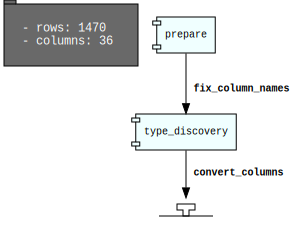

In [7]:
employees.visualize_transforms()

In [8]:
transformed_emp = employees.auto_transform()

loop1:   0%|          | 0/7 [00:00<?, ?it/s]

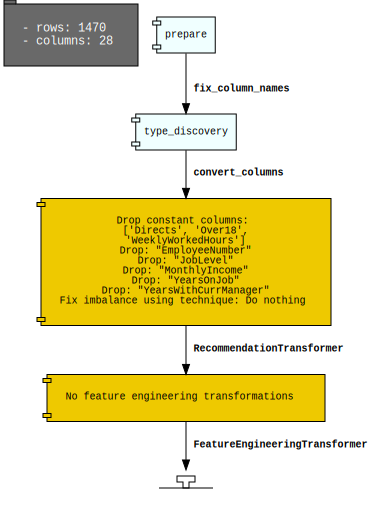

In [9]:
transformed_emp.visualize_transforms()

# Categorical Encoding

In [10]:
transformed_emp["JobFunction"].value_counts()

Software Developer    961
Product Management    446
Admin                  63
Name: JobFunction, dtype: int64

In [11]:
from ads.dataset.label_encoder import DataFrameLabelEncoder
ds_encoded = DataFrameLabelEncoder().fit_transform(transformed_emp.to_pandas())
ds_encoded[["JobFunction"]].value_counts()

JobFunction
2              961
1              446
0               63
dtype: int64

In [15]:
from ads.dataset.helper import up_sample
ds_upsampled = up_sample(transformed_emp, ['Attrition'], sampler='default', feature_types=None)
type(ds_upsampled)

pandas.core.frame.DataFrame

In [20]:
ds_upsampled[ds_upsampled["name"]=="Tracy Moore"]

,Age,TravelForWork,SalaryLevel,JobFunction,CommuteLength,EducationalLevel,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobRole,JobSatisfaction,MaritalStatus,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,YearsinIndustry,TrainingTimesLastYear,WorkLifeBalance,YearsAtCurrentLevel,YearsSinceLastPromotion,name,
0,42,infrequent,5054,Product Management,2,L2,Life Sciences,2,Female,94,3,Sales Executive,4,Single,19479,8,Yes,11,3,1,0,8,0,1,4,0,Tracy Moore,Yes
1639,42,infrequent,5054,Product Management,2,L2,Life Sciences,2,Female,94,3,Sales Executive,4,Single,19479,8,Yes,11,3,1,0,8,0,1,4,0,Tracy Moore,Yes
2054,42,infrequent,5054,Product Management,2,L2,Life Sciences,2,Female,94,3,Sales Executive,4,Single,19479,8,Yes,11,3,1,0,8,0,1,4,0,Tracy Moore,Yes
2111,42,infrequent,5054,Product Management,2,L2,Life Sciences,2,Female,94,3,Sales Executive,4,Single,19479,8,Yes,11,3,1,0,8,0,1,4,0,Tracy Moore,Yes
2313,42,infrequent,5054,Product Management,2,L2,Life Sciences,2,Female,94,3,Sales Executive,4,Single,19479,8,Yes,11,3,1,0,8,0,1,4,0,Tracy Moore,Yes
2351,42,infrequent,5054,Product Management,2,L2,Life Sciences,2,Female,94,3,Sales Executive,4,Single,19479,8,Yes,11,3,1,0,8,0,1,4,0,Tracy Moore,Yes
2454,42,infrequent,5054,Product Management,2,L2,Life Sciences,2,Female,94,3,Sales Executive,4,Single,19479,8,Yes,11,3,1,0,8,0,1,4,0,Tracy Moore,Yes


In [22]:
ds_upsampled[''].value_counts()

Yes    1233
No     1233
Name: , dtype: int64

In [23]:
employees['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

# Split Dataset into train and test

In [24]:
data_split = transformed_emp.train_validation_test_split(test_size=0.1, validation_size=0.1)
train, validation, test = data_split
print(data_split)

(Train Data
Shape of X:(1190, 27)
Shape of y:(1190,), Validation Data
Shape of X:(133, 27)
Shape of y:(133,), Test Data
Shape of X:(147, 27)
Shape of y:(147,))


In [25]:
print(train)

Train Data
Shape of X:(1190, 27)
Shape of y:(1190,)


<AxesSubplot:>

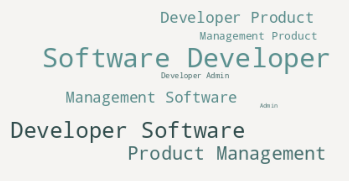

In [27]:
transformed_emp["JobFunction"].ads.feature_plot()